## Set up

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Statistical Tests
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
from scipy.stats import norm

np.set_printoptions(suppress=True)


# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.dates as dates
import seaborn as sns
from sklearn.model_selection import learning_curve
import datetime

pd.options.display.float_format = '{:20,.2f}'.format



In [2]:
import env

from john_wrangle import clean_zillow, missing_zero_values_table, features_missing, handle_missing_values, get_zillow_data, split, seperate_y, scale_data, split_seperate_scale 

import explore

## Acquisistion

In [3]:
df = pd.read_csv('zillowcluster_df.csv')

In [4]:
df.head()

,Unnamed: 0,typeconstructiontypeid,storytypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,basementsqft,...,taxdelinquencyyear,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,storydesc,typeconstructiondesc
0,0,nan,nan,2.00,nan,nan,nan,10711855,1087254,nan,...,nan,"60,371,132,321,007.00",-0.01,2017-07-07,NaN,NaN,NaN,Central,NaN,NaN
1,1,nan,nan,2.00,nan,nan,1.00,10711877,1072280,nan,...,nan,"60,371,132,321,007.00",0.02,2017-08-29,Central,NaN,NaN,Central,NaN,NaN
2,2,nan,nan,2.00,nan,nan,1.00,10711888,1340933,nan,...,nan,"60,371,132,321,007.00",0.08,2017-04-04,Central,NaN,NaN,Central,NaN,NaN
3,3,nan,nan,2.00,nan,nan,nan,10711910,1878109,nan,...,nan,"60,371,132,321,008.00",-0.04,2017-03-17,NaN,NaN,NaN,Central,NaN,NaN
4,4,nan,nan,2.00,nan,nan,nan,10711923,2190858,nan,...,nan,"60,371,132,321,008.00",-0.01,2017-03-24,NaN,NaN,NaN,Central,NaN,NaN


## Preperation

In [5]:
df = clean_zillow(df)

In [6]:
df.shape

(58201, 30)

In [7]:
train, validate, test = split(df)

In [8]:
train.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,poolcnt,...,age_bin,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,bath_bed_ratio,la_county,orange_county,ventura_county
parcelid,,,,,,,,,,,,,,,,,,,,,
12802731,2.00,1.00,1.00,3.00,"1,156.00",6037,33.98,-118.06,"5,471.00",0.00,...,0.53,0.00,1.26,0.13,0.10,0.20,0.33,1,0,0
12430348,7.00,5.00,1.00,2.00,998.00,6037,33.84,-118.11,"5,131.00",0.00,...,0.53,0.00,1.25,0.12,0.10,0.10,0.50,1,0,0
12861801,2.00,1.00,3.00,4.00,"2,488.00",6037,33.98,-117.95,"21,778.00",0.00,...,0.33,0.00,1.27,0.50,0.30,0.50,0.75,1,0,0
11730295,1.00,5.00,3.00,6.00,"2,176.00",6037,34.03,-118.30,"7,184.00",0.00,...,0.67,0.00,1.23,0.16,0.20,0.50,0.50,1,0,0
12962129,2.00,1.00,3.00,3.00,"1,942.00",6037,34.12,-118.00,"8,662.00",0.00,...,0.53,0.00,1.17,0.20,0.20,0.40,1.00,1,0,0


In [9]:
train.shape

(32592, 30)

In [10]:
validate.shape

(13968, 30)

In [11]:
test.shape

(11641, 30)

In [12]:
train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test)

In [13]:
train_scaled.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,poolcnt,roomcnt,...,age_of_home,age_bin,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,la_county,orange_county,ventura_county
0,0.04,0.00,0.00,0.25,0.25,0.46,0.73,0.14,0.00,0.00,...,0.50,0.57,0.07,0.49,0.14,0.25,0.29,1.00,0.00,0.00
1,0.26,0.33,0.00,0.12,0.20,0.36,0.71,0.13,0.00,0.00,...,0.50,0.57,0.08,0.49,0.13,0.25,0.14,1.00,0.00,0.00
2,0.04,0.00,0.31,0.38,0.68,0.46,0.79,0.59,0.00,0.00,...,0.30,0.36,0.10,0.50,0.59,0.75,0.71,1.00,0.00,0.00
3,0.00,0.33,0.31,0.62,0.58,0.50,0.60,0.19,0.00,0.00,...,0.72,0.71,0.11,0.48,0.18,0.50,0.71,1.00,0.00,0.00
4,0.04,0.00,0.31,0.25,0.50,0.57,0.76,0.23,0.00,0.00,...,0.52,0.57,0.13,0.45,0.23,0.50,0.57,1.00,0.00,0.00


In [14]:
train_scaled.shape

(32592, 24)

In [15]:
validate_scaled.shape

(13968, 24)

In [16]:
test_scaled.shape

(11641, 24)

# Modeling

In [17]:
list(train_scaled.columns)

['heatingorsystemtypeid',
 'airconditioningtypeid',
 'bathroomcnt',
 'bedroomcnt',
 'calculatedfinishedsquarefeet',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'poolcnt',
 'roomcnt',
 'fireplaceflag',
 'taxvaluedollarcnt',
 'taxamount',
 'logerror',
 'age_of_home',
 'age_bin',
 'baths_per_sqft',
 'taxrate',
 'acres',
 'acres_bin',
 'sqft_bin',
 'la_county',
 'orange_county',
 'ventura_county']

## Longitude + Latitude

In [18]:
# assign variable we will use in our model

X = train_scaled[['longitude', 'latitude']]

In [19]:
X.head()

,longitude,latitude
0,0.73,0.46
1,0.71,0.36
2,0.79,0.46
3,0.60,0.50
4,0.76,0.57


In [20]:
X.corr()

,longitude,latitude
longitude,1.00,-0.61
latitude,-0.61,1.00


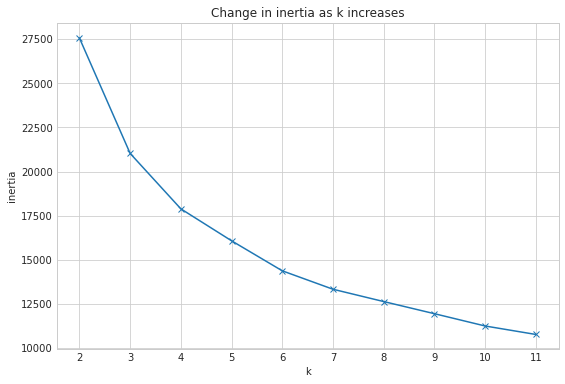

In [21]:
#plot inertia vs k to choose k
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(train_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [22]:
## it would appear the most appropriate k would be 4

In [23]:
kmeans = KMeans(n_clusters=4)

## make the model, n_clusters being how many clusters you want in your model 

In [24]:
kmeans.fit(X)

## fit the model to the fields you want to use in your model

KMeans(n_clusters=4)

In [25]:
kmeans.predict(X)

## make your predictions

array([2, 2, 2, ..., 0, 2, 1], dtype=int32)

In [26]:
train_scaled['cluster'] = kmeans.predict(X)

train['cluster'] = kmeans.predict(X)

## store the predictions as a column on your df

In [27]:
train_scaled.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,poolcnt,roomcnt,...,age_bin,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,la_county,orange_county,ventura_county,cluster
0,0.04,0.00,0.00,0.25,0.25,0.46,0.73,0.14,0.00,0.00,...,0.57,0.07,0.49,0.14,0.25,0.29,1.00,0.00,0.00,2
1,0.26,0.33,0.00,0.12,0.20,0.36,0.71,0.13,0.00,0.00,...,0.57,0.08,0.49,0.13,0.25,0.14,1.00,0.00,0.00,2
2,0.04,0.00,0.31,0.38,0.68,0.46,0.79,0.59,0.00,0.00,...,0.36,0.10,0.50,0.59,0.75,0.71,1.00,0.00,0.00,2
3,0.00,0.33,0.31,0.62,0.58,0.50,0.60,0.19,0.00,0.00,...,0.71,0.11,0.48,0.18,0.50,0.71,1.00,0.00,0.00,2
4,0.04,0.00,0.31,0.25,0.50,0.57,0.76,0.23,0.00,0.00,...,0.57,0.13,0.45,0.23,0.50,0.57,1.00,0.00,0.00,2


In [28]:
train.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,poolcnt,...,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,bath_bed_ratio,la_county,orange_county,ventura_county,cluster
parcelid,,,,,,,,,,,,,,,,,,,,,
12802731,2.00,1.00,1.00,3.00,"1,156.00",6037,33.98,-118.06,"5,471.00",0.00,...,0.00,1.26,0.13,0.10,0.20,0.33,1,0,0,2
12430348,7.00,5.00,1.00,2.00,998.00,6037,33.84,-118.11,"5,131.00",0.00,...,0.00,1.25,0.12,0.10,0.10,0.50,1,0,0,2
12861801,2.00,1.00,3.00,4.00,"2,488.00",6037,33.98,-117.95,"21,778.00",0.00,...,0.00,1.27,0.50,0.30,0.50,0.75,1,0,0,2
11730295,1.00,5.00,3.00,6.00,"2,176.00",6037,34.03,-118.30,"7,184.00",0.00,...,0.00,1.23,0.16,0.20,0.50,0.50,1,0,0,2
12962129,2.00,1.00,3.00,3.00,"1,942.00",6037,34.12,-118.00,"8,662.00",0.00,...,0.00,1.17,0.20,0.20,0.40,1.00,1,0,0,2


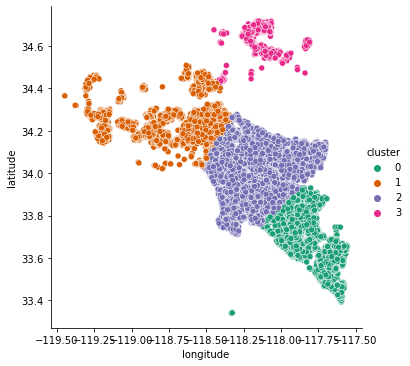

In [29]:
sns.relplot(data=train, x='longitude', y='latitude', hue='cluster', palette= 'Dark2')

(-0.3, 0.3)

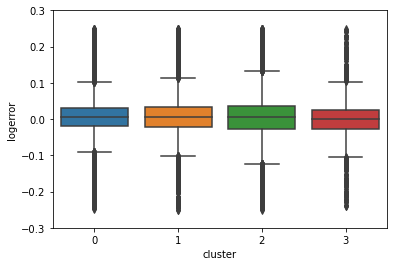

In [30]:
sns.boxplot(y=train.logerror, x=train.cluster)
plt.ylim(-.3, .3)

In [31]:
train.groupby('fips').cluster.value_counts()

fips  cluster
6037  2          14028
      1           3836
      3           1545
      0             51
6059  0           9343
      2            855
6111  1           2934
Name: cluster, dtype: int64

## Statistical testing

In [32]:
from math import sqrt

In [33]:
## Cluster 0

In [34]:
H0 = 'There is no difference in the logerror between Cluster 0 and the general population'

H1 = 'There is a difference in the logerror between Cluster 0 and the general population'

alpha = .05

In [35]:
cluster0 = train[train.cluster == 0]

μ = train.logerror.mean()
xbar = cluster0.logerror.mean()
s = cluster0.logerror.std()
n = cluster0.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))
t

1.8495979707984365

In [36]:
p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test
p

0.06440290753093432

In [37]:
if p > alpha:
    print('We fail to reject the null hypothesis')
else: 
    print(H1)

We fail to reject the null hypothesis


In [38]:
# the p value is much to high to reject

In [39]:
## Cluster 1

In [40]:
H0 = 'There is no difference in the logerror between Cluster 1 and the general population'

H1 = 'There is a difference in the logerror between Cluster 1 and the general population'

alpha = .05

In [41]:
cluster1 = train[train.cluster == 1]

μ = train.logerror.mean()
xbar = cluster1.logerror.mean()
s = cluster1.logerror.std()
n = cluster1.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))
t

2.9048522482398758

In [42]:
p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test
p

0.003686160972526096

In [43]:
if p > alpha:
    print('We fail to reject the null hypothesis')
else: 
    print(H1)

There is a difference in the logerror between Cluster 1 and the general population


In [91]:
# we can conclude that there is a difference between the log error rates of Cluster 1 and the general population

# homes that are in the North West section of the area surveyed

In [45]:
## Cluster 2

In [46]:
H0 = 'There is no difference in the logerror between Cluster 2 and the general population'

H1 = 'There is a difference in the logerror between Cluster 2 and the general population'

alpha = .05

In [47]:
cluster2 = train[train.cluster == 2]

μ = train.logerror.mean()
xbar = cluster2.logerror.mean()
s = cluster2.logerror.std()
n = cluster2.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

t, p

(-1.8386525707551291, 1.9340137821158294)

In [48]:
if p > alpha:
    print('We fail to reject the null hypothesis')
else: 
    print(H1)

We fail to reject the null hypothesis


In [49]:
# much too high to reject the null

In [50]:
## Cluster 3

In [51]:
H0 = 'There is no difference in the logerror between Cluster 3 and the general population'

H1 = 'There is a difference in the logerror between Cluster 3 and the general population'

alpha = .05

In [52]:
cluster3 = train[train.cluster == 3]

μ = train.logerror.mean()
xbar = cluster3.logerror.mean()
s = cluster3.logerror.std()
n = cluster3.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

t, p

(-3.7924971599956923, 1.9998451110653586)

In [53]:
if p > alpha:
    print('We fail to reject the null hypothesis')
else: 
    print(H1)

We fail to reject the null hypothesis


In [54]:
## this is much to high to reject the null

In [55]:
## of all the clusters in the lot/long model only 1 cluster has a significantly different logerror rate

## homes that are in the North West corner of the surveyed area

In [56]:
cluster1.shape

(6770, 31)

## Lot Size + Age + Latitude

In [57]:
# assign variable we will use in our model

X = train_scaled[['calculatedfinishedsquarefeet', 'age_of_home', 'latitude']]

In [58]:
X.head()

,calculatedfinishedsquarefeet,age_of_home,latitude
0,0.25,0.50,0.46
1,0.20,0.50,0.36
2,0.68,0.30,0.46
3,0.58,0.72,0.50
4,0.50,0.52,0.57


In [59]:
X.corr()

,calculatedfinishedsquarefeet,age_of_home,latitude
calculatedfinishedsquarefeet,1.00,-0.29,0.06
age_of_home,-0.29,1.00,0.04
latitude,0.06,0.04,1.00


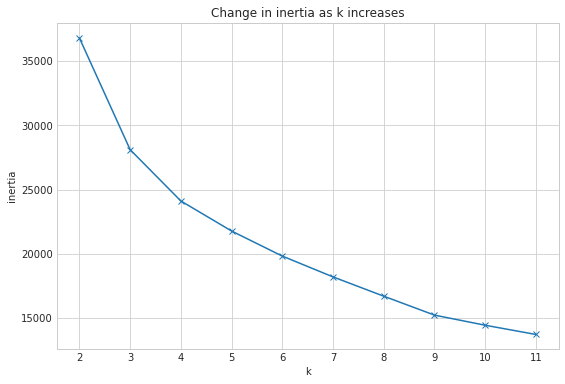

In [60]:
#plot inertia vs k to choose k
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(train_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [61]:
## A good k looks like 4

In [62]:
kmeans = KMeans(n_clusters=4)

## make the model, n_clusters being how many clusters you want in your model 

kmeans.fit(X)

## fit the model to the fields you want to use in your model

kmeans.predict(X)

## make your predictions

train_scaled['cluster'] = kmeans.predict(X)
train['cluster'] = kmeans.predict(X)

## store the predictions as a column on your df

In [63]:
train_scaled.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,poolcnt,roomcnt,...,age_bin,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,la_county,orange_county,ventura_county,cluster
0,0.04,0.00,0.00,0.25,0.25,0.46,0.73,0.14,0.00,0.00,...,0.57,0.07,0.49,0.14,0.25,0.29,1.00,0.00,0.00,0
1,0.26,0.33,0.00,0.12,0.20,0.36,0.71,0.13,0.00,0.00,...,0.57,0.08,0.49,0.13,0.25,0.14,1.00,0.00,0.00,0
2,0.04,0.00,0.31,0.38,0.68,0.46,0.79,0.59,0.00,0.00,...,0.36,0.10,0.50,0.59,0.75,0.71,1.00,0.00,0.00,2
3,0.00,0.33,0.31,0.62,0.58,0.50,0.60,0.19,0.00,0.00,...,0.71,0.11,0.48,0.18,0.50,0.71,1.00,0.00,0.00,0
4,0.04,0.00,0.31,0.25,0.50,0.57,0.76,0.23,0.00,0.00,...,0.57,0.13,0.45,0.23,0.50,0.57,1.00,0.00,0.00,0


In [64]:
train.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,poolcnt,...,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,bath_bed_ratio,la_county,orange_county,ventura_county,cluster
parcelid,,,,,,,,,,,,,,,,,,,,,
12802731,2.00,1.00,1.00,3.00,"1,156.00",6037,33.98,-118.06,"5,471.00",0.00,...,0.00,1.26,0.13,0.10,0.20,0.33,1,0,0,0
12430348,7.00,5.00,1.00,2.00,998.00,6037,33.84,-118.11,"5,131.00",0.00,...,0.00,1.25,0.12,0.10,0.10,0.50,1,0,0,0
12861801,2.00,1.00,3.00,4.00,"2,488.00",6037,33.98,-117.95,"21,778.00",0.00,...,0.00,1.27,0.50,0.30,0.50,0.75,1,0,0,2
11730295,1.00,5.00,3.00,6.00,"2,176.00",6037,34.03,-118.30,"7,184.00",0.00,...,0.00,1.23,0.16,0.20,0.50,0.50,1,0,0,0
12962129,2.00,1.00,3.00,3.00,"1,942.00",6037,34.12,-118.00,"8,662.00",0.00,...,0.00,1.17,0.20,0.20,0.40,1.00,1,0,0,0


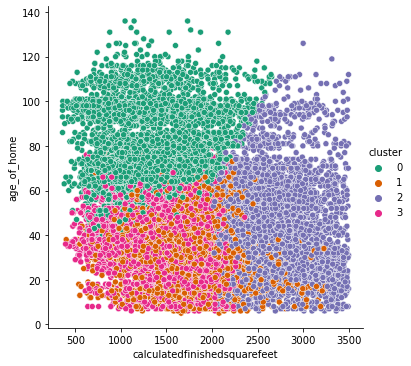

In [65]:
sns.relplot(data=train, x='calculatedfinishedsquarefeet', y='age_of_home', hue='cluster', palette= 'Dark2')

(-0.3, 0.3)

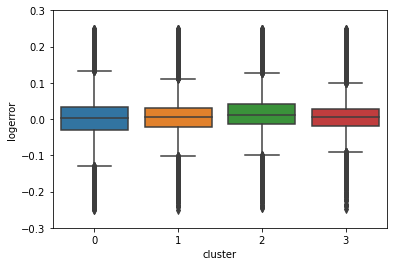

In [66]:
sns.boxplot(y=train.logerror, x=train.cluster)
plt.ylim(-.3, .3)

In [67]:
train.groupby('fips').cluster.value_counts()

fips  cluster
6037  0          10341
      1           4891
      2           2764
      3           1464
6059  3           6699
      2           2329
      0           1170
6111  1           2020
      2            488
      0            426
Name: cluster, dtype: int64

### Statistical Tests

In [68]:
## Cluster 0

In [69]:
H0 = 'There is no difference in the logerror between Cluster 0 and the general population'

H1 = 'There is a difference in the logerror between Cluster 0 and the general population'

alpha = .05

In [70]:
cluster0 = train[train.cluster == 0]

μ = train.logerror.mean()
xbar = cluster0.logerror.mean()
s = cluster0.logerror.std()
n = cluster0.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

t, p

(-4.573034044464397, 1.9999951445210866)

In [71]:
if p > alpha:
    print('We fail to reject the null hypothesis')
else: 
    print(H1)

We fail to reject the null hypothesis


In [72]:
# much too high to reject null

In [73]:
## Cluster 1

In [74]:
H0 = 'There is no difference in the logerror between Cluster 1 and the general population'

H1 = 'There is a difference in the logerror between Cluster 1 and the general population'

alpha = .05

In [75]:
cluster1 = train[train.cluster == 1]

μ = train.logerror.mean()
xbar = cluster1.logerror.mean()
s = cluster1.logerror.std()
n = cluster1.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

t, p

(-0.6534178009477151, 1.4864912930791419)

In [76]:
if p > alpha:
    print('We fail to reject the null hypothesis')
else: 
    print(H1)

We fail to reject the null hypothesis


In [77]:
# We can conclude that Cluster 1 has a different logerror rate than the rest of the population

In [78]:
## Cluster 2

In [79]:
H0 = 'There is no difference in the logerror between Cluster 2 and the general population'

H1 = 'There is a difference in the logerror between Cluster 2 and the general population'

alpha = .05

In [80]:
cluster2 = train[train.cluster == 2]

μ = train.logerror.mean()
xbar = cluster2.logerror.mean()
s = cluster2.logerror.std()
n = cluster2.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

t, p

(9.24204201780716, 3.3676762103654513e-20)

In [81]:
if p > alpha:
    print('We fail to reject the null hypothesis')
else: 
    print(H1)

There is a difference in the logerror between Cluster 2 and the general population


In [90]:
# there is a difference in logerror in cluster 2 than the general population

# homes that are large regardless of age

In [83]:
## Cluster 3

In [84]:
H0 = 'There is no difference in the logerror between Cluster 3 and the general population'

H1 = 'There is a difference in the logerror between Cluster 3 and the general population'

alpha = .05

In [85]:
cluster3 = train[train.cluster == 3]

μ = train.logerror.mean()
xbar = cluster3.logerror.mean()
s = cluster3.logerror.std()
n = cluster3.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

t, p

(-0.9807102345399239, 1.6732352766922047)

In [86]:
if p > alpha:
    print('We fail to reject the null hypothesis')
else: 
    print(H1)

We fail to reject the null hypothesis


In [87]:
# much too high p value to reject null hypothesis

In [88]:
## only cluster 2 seems to have significant difference

## homes that are large, regardless of age

In [89]:
cluster2.shape

(5581, 31)

## Tax rate + Square Feet + Age + Latitude

In [92]:
# assign variable we will use in our model

X = train_scaled[['latitude', 'calculatedfinishedsquarefeet', 'age_of_home', 'taxrate']]

In [93]:
X.head()

,latitude,calculatedfinishedsquarefeet,age_of_home,taxrate
0,0.46,0.25,0.50,0.49
1,0.36,0.20,0.50,0.49
2,0.46,0.68,0.30,0.50
3,0.50,0.58,0.72,0.48
4,0.57,0.50,0.52,0.45


In [94]:
X.corr()

,latitude,calculatedfinishedsquarefeet,age_of_home,taxrate
latitude,1.00,0.06,0.04,0.33
calculatedfinishedsquarefeet,0.06,1.00,-0.29,-0.07
age_of_home,0.04,-0.29,1.00,0.07
taxrate,0.33,-0.07,0.07,1.00


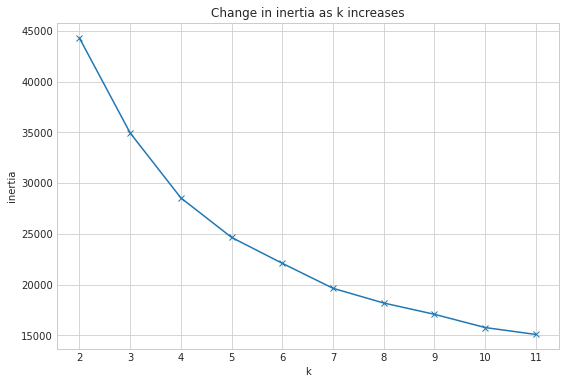

In [95]:
#plot inertia vs k to choose k
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(train_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [96]:
## a good k looks like 5

In [97]:
kmeans = KMeans(n_clusters=5)

## make the model, n_clusters being how many clusters you want in your model 

kmeans.fit(X)

## fit the model to the fields you want to use in your model

kmeans.predict(X)

## make your predictions

train_scaled['cluster'] = kmeans.predict(X)

train['cluster'] = kmeans.predict(X)

## store the predictions as a column on your df

In [98]:
train_scaled.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,poolcnt,roomcnt,...,age_bin,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,la_county,orange_county,ventura_county,cluster
0,0.04,0.00,0.00,0.25,0.25,0.46,0.73,0.14,0.00,0.00,...,0.57,0.07,0.49,0.14,0.25,0.29,1.00,0.00,0.00,0
1,0.26,0.33,0.00,0.12,0.20,0.36,0.71,0.13,0.00,0.00,...,0.57,0.08,0.49,0.13,0.25,0.14,1.00,0.00,0.00,0
2,0.04,0.00,0.31,0.38,0.68,0.46,0.79,0.59,0.00,0.00,...,0.36,0.10,0.50,0.59,0.75,0.71,1.00,0.00,0.00,1
3,0.00,0.33,0.31,0.62,0.58,0.50,0.60,0.19,0.00,0.00,...,0.71,0.11,0.48,0.18,0.50,0.71,1.00,0.00,0.00,0
4,0.04,0.00,0.31,0.25,0.50,0.57,0.76,0.23,0.00,0.00,...,0.57,0.13,0.45,0.23,0.50,0.57,1.00,0.00,0.00,4


In [99]:
train.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,poolcnt,...,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,bath_bed_ratio,la_county,orange_county,ventura_county,cluster
parcelid,,,,,,,,,,,,,,,,,,,,,
12802731,2.00,1.00,1.00,3.00,"1,156.00",6037,33.98,-118.06,"5,471.00",0.00,...,0.00,1.26,0.13,0.10,0.20,0.33,1,0,0,0
12430348,7.00,5.00,1.00,2.00,998.00,6037,33.84,-118.11,"5,131.00",0.00,...,0.00,1.25,0.12,0.10,0.10,0.50,1,0,0,0
12861801,2.00,1.00,3.00,4.00,"2,488.00",6037,33.98,-117.95,"21,778.00",0.00,...,0.00,1.27,0.50,0.30,0.50,0.75,1,0,0,1
11730295,1.00,5.00,3.00,6.00,"2,176.00",6037,34.03,-118.30,"7,184.00",0.00,...,0.00,1.23,0.16,0.20,0.50,0.50,1,0,0,0
12962129,2.00,1.00,3.00,3.00,"1,942.00",6037,34.12,-118.00,"8,662.00",0.00,...,0.00,1.17,0.20,0.20,0.40,1.00,1,0,0,4


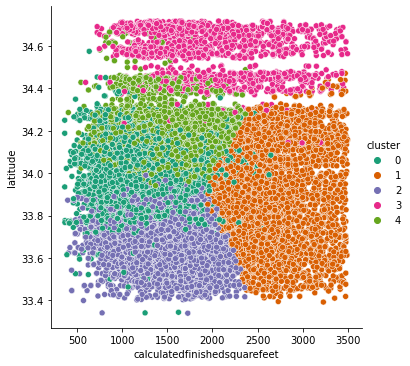

In [105]:
sns.relplot(data=train, x='calculatedfinishedsquarefeet', y='latitude', hue='cluster', palette= 'Dark2')

(-0.3, 0.3)

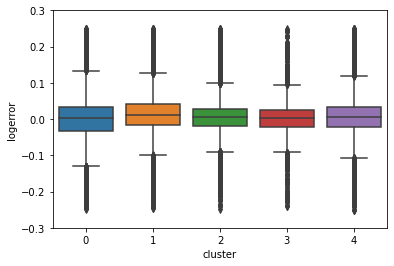

In [106]:
sns.boxplot(y=train.logerror, x=train.cluster)
plt.ylim(-.3, .3)

In [107]:
train.groupby('fips').cluster.value_counts()

fips  cluster
6037  0          8649
      4          4966
      1          2599
      3          2080
      2          1166
6059  2          6439
      1          2396
      0          1345
      4            17
      3             1
6111  4          2211
      1           526
      0           116
      3            81
Name: cluster, dtype: int64

## Statiscal Tests

In [108]:
## Cluster 0

In [109]:
H0 = 'There is no difference in the logerror between Cluster 0 and the general population'

H1 = 'There is a difference in the logerror between Cluster 0 and the general population'

alpha = .05

In [110]:
cluster0 = train[train.cluster == 0]

μ = train.logerror.mean()
xbar = cluster0.logerror.mean()
s = cluster0.logerror.std()
n = cluster0.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

t, p

(-4.355766274198342, 1.9999866090399916)

In [111]:
if p > alpha:
    print('We fail to reject the null hypothesis')
else: 
    print(H1)

We fail to reject the null hypothesis


In [112]:
# Much too high to reject the null hypothesis

In [113]:
## Cluster 1

In [114]:
H0 = 'There is no difference in the logerror between Cluster 1 and the general population'

H1 = 'There is a difference in the logerror between Cluster 1 and the general population'

alpha = .05

In [115]:
cluster1 = train[train.cluster == 1]

μ = train.logerror.mean()
xbar = cluster1.logerror.mean()
s = cluster1.logerror.std()
n = cluster1.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

t, p

(9.072740932523576, 1.5843118645496282e-19)

In [116]:
if p > alpha:
    print('We fail to reject the null hypothesis')
else: 
    print(H1)

There is a difference in the logerror between Cluster 1 and the general population


In [117]:
# there is a difference in logerror rates in cluster 1 than the general population

# homes that are large, but mid to south section of area surveyed

In [118]:
## Cluster 2

In [120]:
H0 = 'There is no difference in the logerror between Cluster 2 and the general population'

H1 = 'There is a difference in the logerror between Cluster 2 and the general population'

alpha = .05

In [126]:
cluster2 = train[train.cluster == 2]

μ = train.logerror.mean()
xbar = cluster2.logerror.mean()
s = cluster2.logerror.std()
n = cluster2.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

t, p

(-1.3495073689643824, 1.8227857690368836)

In [127]:
if p > alpha:
    print('We fail to reject the null hypothesis')
else: 
    print(H1)

We fail to reject the null hypothesis


In [128]:
# much too high p value to reject the null

In [124]:
## Cluster 3

In [125]:
H0 = 'There is no difference in the logerror between Cluster 3 and the general population'

H1 = 'There is a difference in the logerror between Cluster 3 and the general population'

alpha = .05

In [129]:
cluster3 = train[train.cluster == 3]

μ = train.logerror.mean()
xbar = cluster3.logerror.mean()
s = cluster3.logerror.std()
n = cluster3.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

t, p

(-3.098424899055455, 1.9980294414898048)

In [130]:
if p > alpha:
    print('We fail to reject the null hypothesis')
else: 
    print(H1)

We fail to reject the null hypothesis


In [131]:
# much too high p value to reject the null

In [132]:
## Cluster 4

In [136]:
H0 = 'There is no difference in the logerror between Cluster 4 and the general population'

H1 = 'There is a difference in the logerror between Cluster 4 and the general population'

alpha = .05

In [134]:
cluster4 = train[train.cluster == 4]

μ = train.logerror.mean()
xbar = cluster4.logerror.mean()
s = cluster4.logerror.std()
n = cluster4.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

t, p

(0.6773035748403854, 0.4982351456299188)

In [137]:
if p > alpha:
    print('We fail to reject the null hypothesis')
else: 
    print(H1)

We fail to reject the null hypothesis


In [138]:
# too large p value to reject the null

In [139]:
# only cluster 1 seems to have significant difference

# homes that are large, but mid to south section of area surveyed

In [140]:
cluster1.shape

(7605, 31)